# Señales y Sistemas Discretos

### Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Señal Discreta

Se tiene una señal x[n] = $5 \cdot \delta[n] + 8 \cdot \delta[n-1] - 4 \cdot \delta[n-2] - 2 \cdot \delta[n-3] + 4 \cdot \delta[n-4] + 1 \cdot \delta[n-6] - 3 \cdot \delta[n-7] + 1 \cdot \delta[n-8]$ . Se muestra a continuación una forma de graficar dicha señal.

RECOMENDACIÓN: compruebe que el resultado es correcto realizando el gráfico de $x[n]$ a mano.

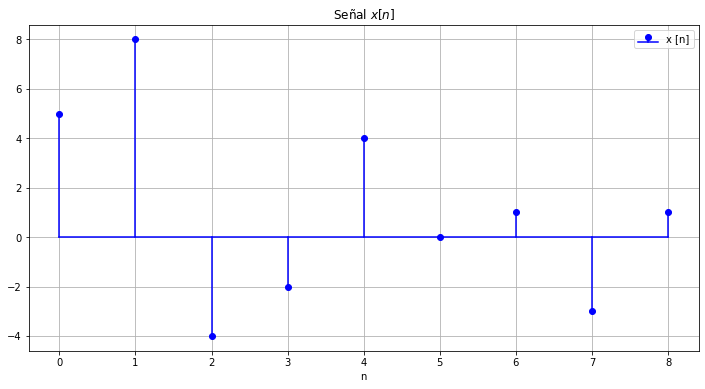

In [54]:
# Definición de la señal
x = np.array([5,8,-4,-2,4,0,1,-3,1])

#Grafico
plt.figure(figsize=(12,6))
(markersa, stemlinesa, baselinea) = plt.stem(x)
plt.setp(baselinea, color="blue")
plt.setp(stemlinesa, color="blue")
plt.setp(markersa, color="blue")
plt.grid()
plt.title("Señal $x[n]$")
plt.xlabel("n")
plt.legend(["x [n]"])
plt.show()

## Sistema Discreto

Suponga que se tiene un Sistema Discreto promediador, cuya salida corresponde al promedio de la últimas N entradas (incluyendo la entrada actual).

A continuación se implenta una función para replicar el comportamiento del sistema, sobre una señal $x[n]$ dada:

In [8]:
def filtro_promediador(x,N):
    #x: señal de entrada
    #N: cantidad de entradas que se promedian para obtener la salida
  pre_x = np.zeros(N-1) #zero padding 
  x = np.concatenate((pre_x,x))
  y = []
  for i in range(N-1,len(x)):
    aux = 0
    for j in range(N):
      aux += x[i-j]/N
    y.append(aux)
  return np.array(y)

### Ejemplo 1
Se aplica el sistema promediador con $N = 2$, se obtiene y grafica la salida.

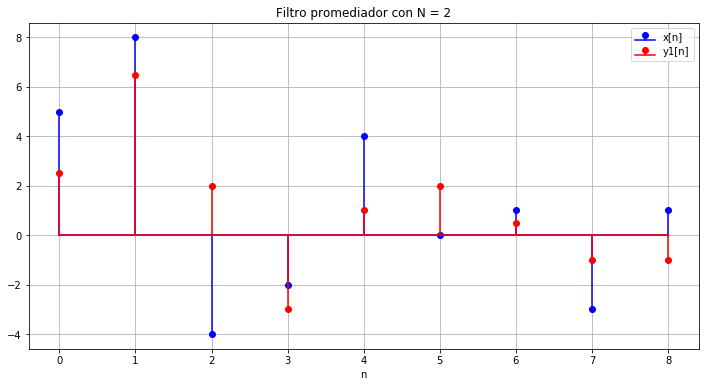

In [52]:
# Se obtiene la salida y1[n]
N1 = 2
y1 = filtro_promediador(x,N1)

#Grafica
plt.figure(figsize=(12,6))
(markersa, stemlinesa, baselinea) = plt.stem(x)
plt.setp(baselinea, color="blue")
plt.setp(stemlinesa, color="blue")
plt.setp(markersa, color="blue")
(markersb, stemlinesb, baselineb) = plt.stem(y1)
plt.setp(baselineb, color="red")
plt.setp(stemlinesb, color="red")
plt.setp(markersb, color="red")
plt.title("Filtro promediador con N = "+str(N1))
plt.xlabel("n")
plt.legend(["x[n]","y1[n]"])
plt.grid()
plt.show()

### Ejemplo 2

Se aplica el sistema com $N = 4$, se obtiene y grafica la salida.

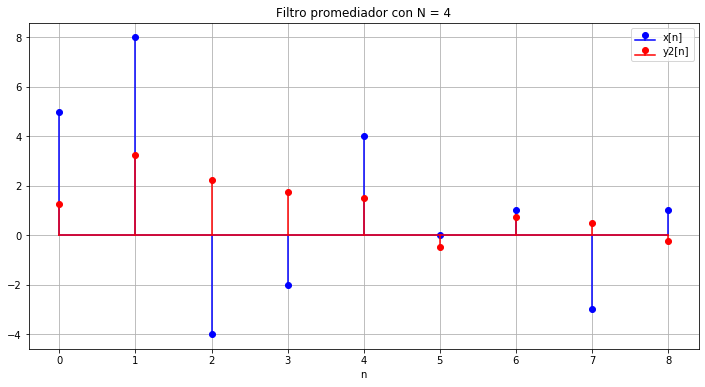

In [53]:
# Se obtiene la salida y1[n]
N2 = 4
y2 = filtro_promediador(x,N2)

#Grafica
plt.figure(figsize=(12,6))
(markersa, stemlinesa, baselinea) = plt.stem(x)
plt.setp(baselinea, color="blue")
plt.setp(stemlinesa, color="blue")
plt.setp(markersa, color="blue")
(markersb, stemlinesb, baselineb) = plt.stem(y2)
plt.setp(baselineb, color="red")
plt.setp(stemlinesb, color="red")
plt.setp(markersb, color="red")
plt.title("Filtro promediador con N = "+str(N2))
plt.xlabel("n")
plt.legend(["x[n]","y2[n]"])
plt.grid()
plt.show()

### Ejemplo 3

Evaluación del efecto de aplicar el sistema promediador sobre una señal real, como la obtenida al realizar un Electrocardiograma. Es la misa señal que se utilizó para estudiar [tipos de muestreo](https://agustinsolano.github.io/SyS_scriptsbook/md_scripts/tipos_de_muestreo.html) .

RECOMENDACIÓN: pruebe que ocurre con la utilización de distintos valores de N

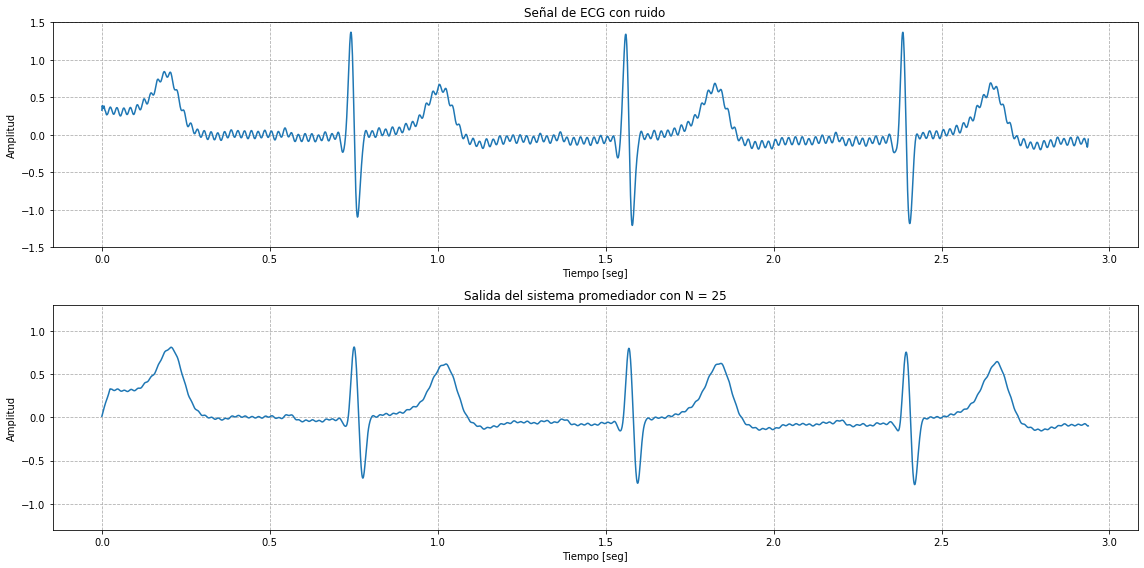

In [55]:
# Se lavanta senial de un archivo separado por comas (.csv)
path_ECG = './external_files/ECG.csv'
senal_ECG = np.genfromtxt(path_ECG, delimiter=',')
fs_ECG = 1000 # Hz: frecuencia  la cual fueron muestrados los datos originales, que se simulan como analogicos
t_ECG = np.arange(0,len(senal_ECG)/fs_ECG,1/fs_ECG)

# Se le agrega una senial paeriodica de baja amplitud
ruido = 0.05*np.sin(2 * np.pi * 50 * t_ECG) 
senal_ECG_wRuido = senal_ECG + ruido

#definimos N y aplicamos el filtro promediador
N3 = 25
y3 = filtro_promediador(senal_ECG_wRuido,N3)

#Grafico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1.plot(t_ECG,senal_ECG_wRuido)
ax1.set_ylim([-1.5,1.5])
ax1.set_title("Señal de ECG con ruido")
ax1.set_xlabel("Tiempo [seg]")
ax1.set_ylabel("Amplitud")
ax1.grid(linestyle='--')
ax2.plot(t_ECG,y3)
ax2.set_ylim([-1.3,1.3])
ax2.set_title("Salida del sistema promediador con N = "+str(N3))
ax2.set_xlabel("Tiempo [seg]")
ax2.set_ylabel("Amplitud")
ax2.grid(linestyle='--')
plt.tight_layout()

### Reflexión

¿Cómo describiría el comportamiento del sistema promedidor? ¿Cuál es el efecto que tiene sobre la señal de entrada? ¿Si tuviera que pensarlo como un filtro, que tipo de filtro es?

En el caso del Ejemplo 3, ¿considera que el resultado es satisfactorio? ¿Ambas señales son equivalentes?